In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


## 📂 Load libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 📂 Load Data

In [3]:
df = pd.read_csv(r"/kaggle/input/ford-car-price-prediction/ford.csv")

## 📂 EDA


In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

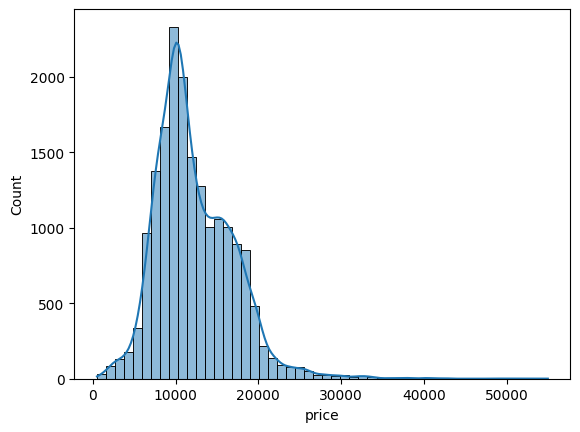

In [9]:
sns.histplot(df['price'],bins = 50,kde=True)

<Axes: >

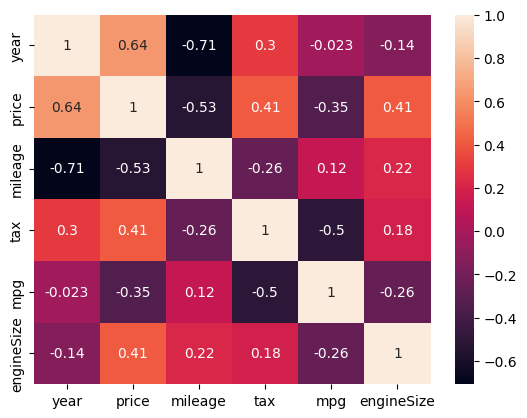

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'Years vs Price')

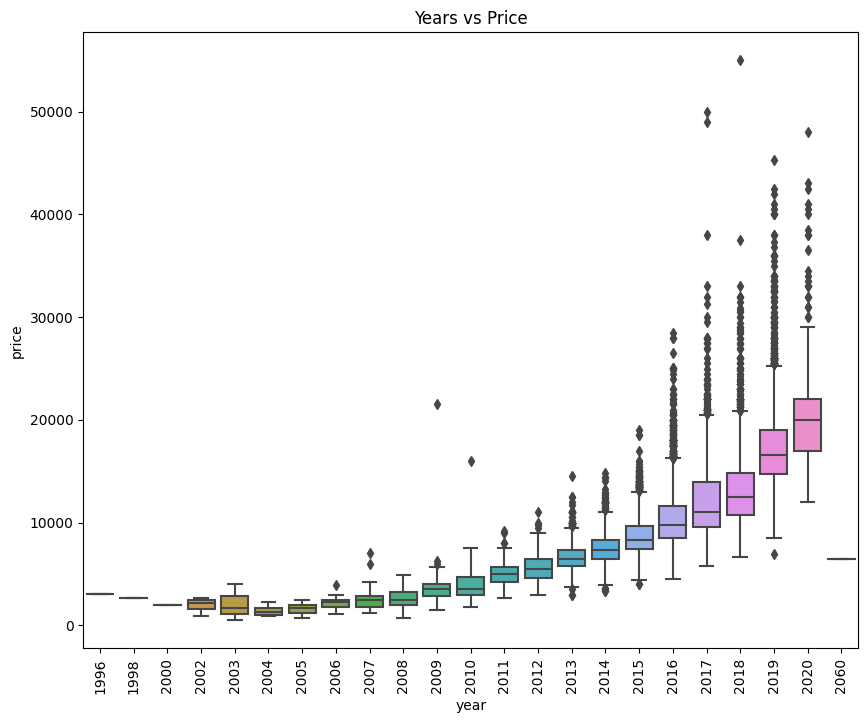

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='year',y='price')
plt.xticks(rotation=90)
plt.title("Years vs Price")

Text(0.5, 1.0, 'Mileage vs Price')

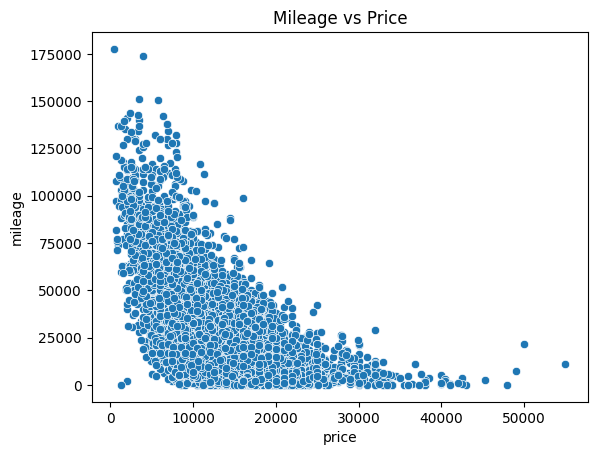

In [12]:
sns.scatterplot(data=df,y='mileage',x='price')
plt.title("Mileage vs Price")

Text(0.5, 1.0, 'Engine Size vs Price')

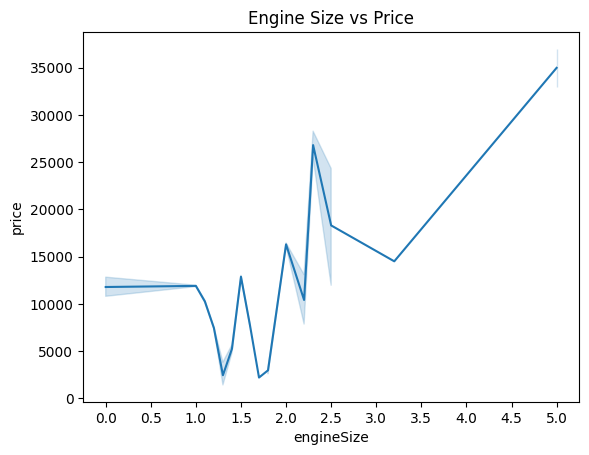

In [13]:
sns.lineplot(data=df,x='engineSize',y='price')
plt.xticks(ticks=[i*0.5 for i in range(11)])
plt.title("Engine Size vs Price")

In [14]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='transmission', ylabel='price'>

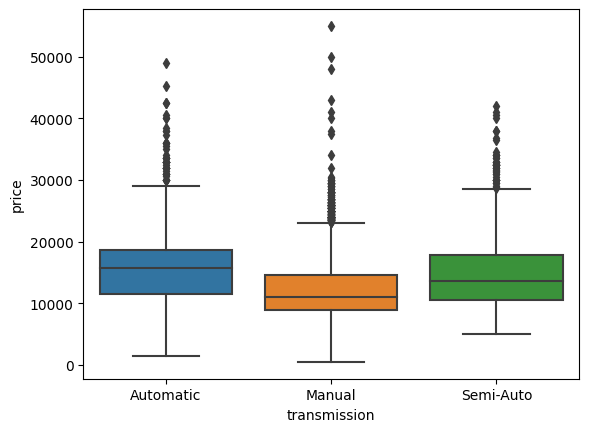

In [15]:
sns.boxplot(data=df,x='transmission',y='price')

Text(0.5, 1.0, 'Model vise prices')

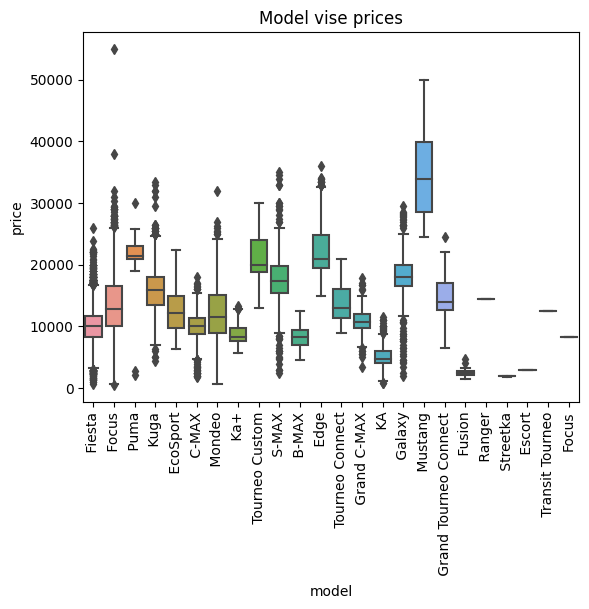

In [16]:
sns.boxplot(x=df['model'],y=df['price'])
plt.xticks(rotation=90)
plt.title("Model vise prices")

Text(0.5, 1.0, 'Taxes on Models')

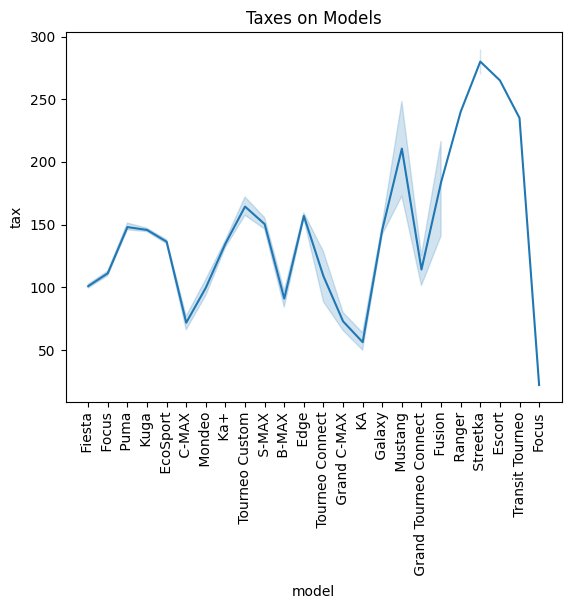

In [17]:
sns.lineplot(data=df,x='model',y='tax')
plt.xticks(rotation=90)
plt.title('Taxes on Models')

## 📂 Data Preprocessing


In [18]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [19]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [20]:
X_one_hot = pd.get_dummies(X,columns = ['model','transmission','fuelType'],drop_first=True)

In [21]:
X_one_hot

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [22]:
X_one_hot = X_one_hot.astype(int)
X_one_hot

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [24]:
columns = ['model','transmission','fuelType']

X_label = X
for i in columns:
    X_label[i] = label_encoder.fit_transform(X_label[i])

In [25]:
X_label

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_col = ['year','mileage','tax','mpg']

X_one_hot[numeric_col] = scaler.fit_transform(X_one_hot[numeric_col])
X_one_hot

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
numeric_col2 = ['year','mileage','tax','mpg','model','fuelType']

X_label[numeric_col2] = scaler.fit_transform(X_label[numeric_col2])
X_label

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,0,-0.380998,0.688777,0.591358,-0.020442,1.0
1,-0.211477,0.552866,1,-0.733359,0.688777,0.591358,-0.020442,1.0
2,-0.211477,0.065128,1,-0.560132,0.688777,0.591358,-0.020442,1.0
3,-0.460699,1.040605,1,-0.662640,0.688777,0.510727,-1.738890,1.5
4,-0.460699,1.040605,0,-1.123724,0.688777,0.510727,-0.909294,1.0
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,1,-0.342172,0.688777,0.591358,-1.067312,1.4
17962,-1.706810,-1.398088,1,0.890398,0.688777,-1.343791,-0.020442,1.0
17963,-0.211477,-0.910349,1,-0.839822,-1.454098,-1.505053,0.927668,1.6
17964,1.034634,0.552866,1,-0.942690,0.688777,0.510727,-0.020442,1.2


## 📂 LinerarRegression Model


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 📂 One_hot Encoding


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [59]:
y_pred = model.predict(X_test)
y_pred

array([ 6866.3580764 ,  9347.6810129 ,  9362.18320785, ...,
       31454.95287518,  9781.20362786, 15253.49970894])

In [60]:
r2_one_hot = r2_score(y_test,y_pred)
r2_one_hot

0.8464177711972798

## 📂 label Encoding


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y, test_size=0.2, random_state=42)

In [66]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = model2.predict(X_test)
y_pred

array([ 6152.07567671,  9374.39134399,  9464.92264335, ...,
       21787.05312508,  9776.43926374, 15806.24990719])

In [68]:
r2_label = r2_score(y_test,y_pred)
r2_label

0.7365884288851351

## 📂 Conclusion


In [69]:
if r2_one_hot > r2_label :
    print("One_hot Encoding Perform better in this model")
else:
    print("label Encoding Perform better in this model")

One_hot Encoding Perform better in this model
